# Train DNN


## Who is Running?

In [25]:
#Matheus
project_root = "/content/drive/MyDrive/Mestrado/Deep Learning/Projeto"
#Gabi
#Jean
# project_root = "/content/drive/MyDrive/Deep Learning/Projeto"
#Sandra

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## General Parâmeters

In [26]:
# Geneal parameters used on this notebook
study_case_name = "Chrysocyon_brachyurus" #@param {type:"string"}

# Neural Networks Hparams
batch_size = 10 #@param {type:"integer"}
num_classes = 2 #@param {type:"integer"}
epochs = 125 #@param {type:"integer"}

Fixed Parameters

In [27]:
# Geneal parameters used on this notebook
study_cases_root_folder = project_root+"/Data/Study_Cases"
presence_absence_folder_path  = project_root+ "/Data/Species_Presence_Absence"
env_info_path = project_root+ "/Data/Species_Enverionment_Info"
base_txt_files_path = project_root + "/Data/Standarized_Rasters/TXT_Aux_Files"
base_csv_files_path = project_root + "/Data/Standarized_Rasters/CSV_Aux_Files"
mean_std_path = f"{base_csv_files_path}/brazil_vars_mean_std.csv" 


## Installs

In [28]:
! pip install geopandas --quiet
! pip install rasterio --quiet
! pip install earthpy --quiet

  ## Retrieving aux Classes

In [29]:
!wget https://raw.githubusercontent.com/math-sasso/extinction-prevention-modeling-MO434/main/Aux_Files/utils.py

--2020-12-14 17:33:39--  https://raw.githubusercontent.com/math-sasso/extinction-prevention-modeling-MO434/main/Aux_Files/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 800 [text/plain]
Saving to: ‘utils.py.2’

utils.py.2          100%[===================>]     800  --.-KB/s    in 0s      

2020-12-14 17:33:39 (50.2 MB/s) - ‘utils.py.2’ saved [800/800]



In [30]:
from utils import Utils

utils_methods = Utils()

## Getting Specie Study Data

In [31]:
import pandas as pd
import os
study_case_path =  os.path.join(study_cases_root_folder,study_case_name +'.csv')
study_information_df = pd.read_csv(study_case_path)
study_information_df

,GBIF_ID,Species_Name,Study_Focus
0,2434450,Chrysocyon brachyurus,True
1,2732686,Attalea maripa,False
2,7413879,Acrocomia aculeata,False
3,2732758,Attalea phalerata,False


In [32]:
species_name = study_information_df[study_information_df['Study_Focus'] ==True]['Species_Name'][0]
taxonKey = study_information_df[study_information_df['Study_Focus'] ==True]['GBIF_ID'][0]
species_name_string = species_name.replace(" ","_")
print(f"species_name: {species_name} \ntaxonKey: {taxonKey} \nspecies_name_string: {species_name_string} \n ")

species_name: Chrysocyon brachyurus 
taxonKey: 2434450 
species_name_string: Chrysocyon_brachyurus 
 


In [33]:
list_raster_files = open(f"{base_txt_files_path}/list_raster_files.txt", 'r').read().splitlines()
list_names_raster = open(f"{base_txt_files_path}/list_names_raster.txt", 'r').read().splitlines()

## Retrieving Study Proposition Dataframe

In [34]:
import pandas as pd
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
species_name_string = species_name.replace(" ","_")
# study_information_df = pd.read_csv(os.path.join(project_root+"/Data/DL_Process_Specific/Study_Cases",species_name_string+'.csv'))
study_information_df = pd.read_csv(os.path.join(project_root+"/Data/Species_Presence_Absence/",species_name_string+'.csv'))

study_information_df

,GBIF_ID,SCIENTIFIC,LONGITUDE,LATITUDE,COUNTRY,STATE_PROV,IDENTIFICA,DAY,MONTH,YEAR,country_ge,geometry,presence/pseudo_absence
0,2434450,"Chrysocyon brachyurus (Illiger, 1815)",-45.762356,-14.868054,Brazil,Bahia,2004-03-22T09:18:00,22,3,2004,Brazil,POINT (-45.762356 -14.868054),1
1,2434450,"Chrysocyon brachyurus (Illiger, 1815)",-45.877050,-14.868649,Brazil,Bahia,2019-12-26T09:43:37,26,12,2019,Brazil,POINT (-45.87705 -14.868649),1
2,2434450,"Chrysocyon brachyurus (Illiger, 1815)",-45.939742,-14.963383,Brazil,Bahia,2019-04-14T00:00:00,14,4,2019,Brazil,POINT (-45.939742 -14.963383),1
3,2434450,"Chrysocyon brachyurus (Illiger, 1815)",-47.626616,-15.966622,Brazil,Distrito Federal,2012-01-05T10:43:00,5,1,2012,Brazil,POINT (-47.626616 -15.966622),1
4,2434450,"Chrysocyon brachyurus (Illiger, 1815)",-47.877723,-15.967905,Brazil,Distrito Federal,2016-09-19T11:14:31,19,9,2016,Brazil,POINT (-47.877723 -15.967905),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2434450,"Chrysocyon brachyurus (Illiger, 1815)",-43.487988,-20.097401,Brazil,NaN,2015-08-18T00:00:00,18,8,2015,Brazil,POINT (-43.487988 -20.097401),1
65,2434450,"Chrysocyon brachyurus (Illiger, 1815)",-45.322208,-9.974261,Brazil,NaN,2013-08-20T00:00:00,20,8,2013,Brazil,POINT (-45.322208 -9.974261),1
66,2434450,"Chrysocyon brachyurus (Illiger, 1815)",-56.261348,-18.816034,Brazil,NaN,2011-10-18T00:00:00,18,10,2011,Brazil,POINT (-56.261348 -18.816034),1
67,2434450,"Chrysocyon brachyurus (Illiger, 1815)",-52.940804,-18.097723,Brazil,NaN,2007-09-20T00:00:00,20,9,2007,Brazil,POINT (-52.940804 -18.097723),1


## Retrieving aux Classes

In [35]:
!wget https://raw.githubusercontent.com/math-sasso/tcc-ecological-niches-modeling/master/samples/files_for_wget/utils.py
# !wget https://raw.githubusercontent.com/math-sasso/tcc-ecological-niches-modeling/master/samples/files_for_wget/raster_standards.py

--2020-12-14 17:33:39--  https://raw.githubusercontent.com/math-sasso/tcc-ecological-niches-modeling/master/samples/files_for_wget/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 800 [text/plain]
Saving to: ‘utils.py.3’

utils.py.3          100%[===================>]     800  --.-KB/s    in 0s      

2020-12-14 17:33:40 (31.6 MB/s) - ‘utils.py.3’ saved [800/800]



In [36]:
from utils import Utils
# from raster_standards import Raster_Standards

# raster_standards = Raster_Standards(raster_base_configs=raster_base_configs)
utils_methods = Utils()

## Grouping presence data with absence data 

In [37]:
species_presence_path = f"{presence_absence_folder_path}/{species_name_string}/{species_name_string}_presence.csv"
species_absence_path = f"{presence_absence_folder_path}/{species_name_string}/{species_name_string}_absence.csv"

env_info_presence_path = f"{env_info_path}/{species_name_string}/{species_name_string}_presence.csv"
env_info_absence_path = f"{env_info_path}/{species_name_string}/{species_name_string}_absence.csv"

species_presence_path

'/content/drive/MyDrive/Mestrado/Deep Learning/Projeto/Data/Species_Presence_Absence/Chrysocyon_brachyurus/Chrysocyon_brachyurus_presence.csv'

In [38]:
import pandas as pd
species_presence_df = pd.read_csv(species_presence_path)
species_absence_df = pd.read_csv(species_absence_path)
env_info_presence_df = pd.read_csv(env_info_presence_path)
env_info_absence_df = pd.read_csv(env_info_absence_path)

presence_df = species_presence_df.merge(env_info_presence_df, left_index=True, right_index=True)
absence_df = species_absence_df.merge(env_info_absence_df, left_index=True, right_index=True)
complete_df = pd.concat([presence_df, absence_df])
complete_model_df = complete_df[complete_df.columns.difference(['LONGITUDE','LATITUDE','coords'])]
complete_model_df

,bio10_mean_temperature_of_warmest_quarter,bio11_mean_temperature_of_coldest_quarter,bio12_annual_precipitation,bio13_precipitation_of_wettest_month,bio14_precipitation_of_driest_month,bio15_precipitation_seasonality,bio16_precipitation_of_wettest_quarter,bio17_precipitation_of_driest_quarter,bio18_precipitation_of_warmest_quarter,bio19_precipitation_of_coldest_quarter,bio1_annual_mean_temperature,bio2_mean_diurnal_range,bio3_isothermality,bio4_temperature_seasonality,bio5_max_temperature_of_warmest_month,bio6_min_temperature_of_coldest_month,bio7_temperature_annual_range,bio8_mean_temperature_of_wettest_quarter,bio9_mean_temperature_of_driest_quarter,elev1_strm_worldclim_elevation,elev2_envirem_terrain_roughness_index,elev3_envirem_topographic_wetness_index,envir10_month_count_by_temp_10,envir11_PET_coldest_quarter,envir12_PET_driest_quarter,envir13_PET_seasonality,envir14_PET_warmest_quarter,envir15_PET_wettest_quarter,envir16_thermicity_index,envir1_annual_PET,envir2_aridity_index_thornthwaite,envir3_climatic_moisture_index,envir4_continentality,envir5_embergers_pluviothermic_quotient,envir6_growing_deg_days_0,envir7_growing_deg_days_5,envir8_max_temp_coldest,envir9_min_temp_warmest,presence/pseudo_absence
0,23.916666,21.016666,1520.0,333.0,2.0,93.633490,858.0,14.0,410.0,14.0,22.783333,12.483334,70.527310,125.287540,30.8,13.1,17.699999,23.366667,21.016666,803.0,15.75,11.71,12.0,117.46,123.62,1741.46,156.98,155.42,594.0,1714.26,56.49,-0.30,3.80,229.47,99738.0,99738.0,281.0,184.0,1
1,23.516666,20.683332,1549.0,336.0,2.0,92.852520,864.0,13.0,412.0,32.0,22.391666,12.400000,70.454550,121.221680,30.3,12.7,17.599998,22.950000,20.700000,889.0,18.75,11.43,12.0,115.39,121.69,1686.53,152.93,152.51,581.0,1681.23,61.20,-0.27,3.70,240.41,98028.0,98028.0,276.0,181.0,1
2,23.833334,20.933332,1672.0,362.0,2.0,93.735490,943.0,13.0,450.0,13.0,22.729166,12.591666,70.344505,126.427470,30.7,12.8,17.900002,23.333334,20.933332,802.0,19.75,11.45,12.0,116.55,123.01,1712.41,154.94,154.20,594.0,1700.13,55.56,-0.30,3.70,231.51,99810.0,99810.0,281.0,185.0,1
3,22.100000,19.100000,1479.0,275.0,6.0,83.748020,746.0,24.0,391.0,39.0,21.125000,11.366667,67.258385,137.601230,28.3,11.4,16.900000,21.866667,19.166666,942.0,38.00,10.36,12.0,108.93,114.55,1657.38,144.19,147.88,545.5,1598.58,61.71,-0.09,3.65,291.58,93204.0,93204.0,263.0,167.0,1
4,21.283333,18.466667,1536.0,270.0,8.0,79.308460,743.0,29.0,428.0,48.0,20.275000,11.416666,67.156870,122.167915,27.8,10.8,17.000000,20.883333,18.583334,1145.0,10.62,11.58,12.0,103.09,108.43,1655.22,138.16,142.18,513.5,1526.88,80.59,0.02,3.55,330.26,88506.0,88506.0,249.0,158.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,25.700000,24.750000,2240.0,334.0,17.0,66.380300,977.0,80.0,313.0,154.0,25.291666,11.466666,70.781890,40.945267,33.2,17.0,16.200000,25.283333,24.933334,127.0,13.00,11.74,12.0,130.78,142.23,1363.81,160.96,143.27,658.5,1748.12,56.12,0.19,1.55,440.66,109782.0,109782.0,309.0,196.0,0
66,24.550000,20.500000,1433.0,278.0,10.0,84.182050,747.0,34.0,647.0,51.0,23.200000,12.000000,68.181816,180.931930,30.5,12.9,17.600000,24.500000,20.733334,525.0,14.50,11.31,12.0,112.68,119.27,2260.50,160.32,164.88,612.0,1744.55,61.25,-0.27,4.90,225.77,103572.0,103572.0,285.0,194.0,0
67,26.516666,25.266666,1822.0,315.0,24.0,68.178170,863.0,101.0,206.0,863.0,25.920834,10.841667,75.815860,49.610226,33.5,19.2,14.299999,25.266666,26.133333,173.0,10.38,11.67,12.0,143.56,140.46,706.94,151.85,140.36,687.0,1719.17,50.55,0.11,1.10,517.94,113382.0,113382.0,302.0,213.0,0
68,27.033333,26.050000,2390.0,320.0,92.0,39.987600,901.0,309.0,426.0,801.0,26.420834,8.091667,82.568016,43.194000,31.7,21.9,9.800001,26.133333,26.533333,91.0,5.38,12.40,12.0,132.26,138.63,816.26,143.73,127.64,721.0,1601.10,15.60,0.35,1.30,799.56,116874.0,116874.0,305.0,231.0,0


## Sacling Values

In [39]:
mean_std_path_df = pd.read_csv(mean_std_path)
mean_std_path_df

,variable,mean,std
0,bio1_annual_mean_temperature,24.779486,1.824487
1,bio2_mean_diurnal_range,10.913644,1.712839
2,bio3_isothermality,74.184914,7.512405
3,bio4_temperature_seasonality,90.093009,71.574002
4,bio5_max_temperature_of_warmest_month,31.777253,1.646235
5,bio6_min_temperature_of_coldest_month,16.734477,3.718209
6,bio7_temperature_annual_range,15.042776,3.558125
7,bio8_mean_temperature_of_wettest_quarter,25.283841,1.362697
8,bio9_mean_temperature_of_driest_quarter,23.810705,2.697927
9,bio10_mean_temperature_of_warmest_quarter,25.658998,1.432784


In [40]:
complete_model_scaled_df = complete_model_df.copy()
for (column_name, column_data) in complete_model_df.iteritems():
  if column_name =="presence/pseudo_absence":
    complete_model_scaled_df[column_name]=column_data
  else:
    variable_info = mean_std_path_df.loc[mean_std_path_df['variable'] == column_name]
    variable_mean = variable_info['mean'].to_numpy()
    variable_std = variable_info['std'].to_numpy()
    column_data_scaled = (column_data.to_numpy() - variable_mean)/variable_std
    complete_model_scaled_df[column_name] = column_data_scaled
complete_model_scaled_df.head()

,bio10_mean_temperature_of_warmest_quarter,bio11_mean_temperature_of_coldest_quarter,bio12_annual_precipitation,bio13_precipitation_of_wettest_month,bio14_precipitation_of_driest_month,bio15_precipitation_seasonality,bio16_precipitation_of_wettest_quarter,bio17_precipitation_of_driest_quarter,bio18_precipitation_of_warmest_quarter,bio19_precipitation_of_coldest_quarter,bio1_annual_mean_temperature,bio2_mean_diurnal_range,bio3_isothermality,bio4_temperature_seasonality,bio5_max_temperature_of_warmest_month,bio6_min_temperature_of_coldest_month,bio7_temperature_annual_range,bio8_mean_temperature_of_wettest_quarter,bio9_mean_temperature_of_driest_quarter,elev1_strm_worldclim_elevation,elev2_envirem_terrain_roughness_index,elev3_envirem_topographic_wetness_index,envir10_month_count_by_temp_10,envir11_PET_coldest_quarter,envir12_PET_driest_quarter,envir13_PET_seasonality,envir14_PET_warmest_quarter,envir15_PET_wettest_quarter,envir16_thermicity_index,envir1_annual_PET,envir2_aridity_index_thornthwaite,envir3_climatic_moisture_index,envir4_continentality,envir5_embergers_pluviothermic_quotient,envir6_growing_deg_days_0,envir7_growing_deg_days_5,envir8_max_temp_coldest,envir9_min_temp_warmest,presence/pseudo_absence
0,-1.216046,-0.967709,-1.134246,0.368359,-0.897368,1.993182,-0.121746,-1.017030,-0.888473,-1.123976,-1.094090,0.916426,-0.486875,0.491722,-0.593629,-0.977481,0.746804,-1.406897,-1.035625,2.067069,0.242576,-0.467716,0.038475,-0.161184,-0.400660,0.262894,0.292039,0.699039,-0.931474,0.427821,0.694033,-1.906269,0.711109,-1.170988,-0.928059,-0.928059,-0.600927,-0.824785,1
1,-1.495223,-1.096236,-1.086623,0.423911,-0.897368,1.953873,-0.084901,-1.022198,-0.873741,-1.055292,-1.308762,0.867773,-0.496561,0.434916,-0.897352,-1.085059,0.718699,-1.712663,-1.152999,2.394045,0.403094,-0.744404,0.038475,-0.339317,-0.535962,0.177854,-0.096621,0.490140,-1.156883,0.071724,0.892320,-1.784844,0.652824,-1.130709,-1.138742,-1.138742,-0.828141,-0.958660,1
2,-1.274207,-0.999841,-0.884636,0.905357,-0.897368,1.998316,0.400224,-1.022198,-0.593840,-1.127792,-1.123779,0.979673,-0.511209,0.507649,-0.654374,-1.058165,0.803015,-1.431358,-1.066513,2.063267,0.456600,-0.724641,0.038475,-0.239493,-0.443424,0.217920,0.096269,0.611459,-0.931474,0.275485,0.654881,-1.906269,0.652824,-1.163477,-0.919188,-0.919188,-0.600927,-0.780160,1
3,-2.483973,-1.706738,-1.201575,-0.705638,-0.832730,1.495603,-0.809517,-0.965352,-1.028423,-1.028582,-2.003021,0.264487,-0.922012,0.663764,-2.112246,-1.434690,0.521967,-2.507655,-1.721337,2.595553,1.433089,-1.801746,0.038475,-0.895231,-1.036507,0.132725,-0.935361,0.157768,-1.772421,-0.819327,0.913791,-1.056294,0.623681,-0.942312,-1.733091,-1.733091,-1.418899,-1.583410,1
4,-3.053959,-1.950939,-1.107971,-0.798224,-0.800411,1.272141,-0.827939,-0.939512,-0.755888,-0.994240,-2.468906,0.293677,-0.935525,0.448136,-2.415969,-1.596058,0.550072,-3.229263,-1.937551,3.367367,-0.031911,-0.596178,0.038475,-1.397791,-1.465547,0.129381,-1.514033,-0.251416,-2.327272,-1.592325,1.708623,-0.611070,0.565396,-0.799900,-2.311916,-2.311916,-2.055099,-1.985035,1


## Funções

In [45]:
def plot_roc_curve(y_true, y_score,output_path,figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, marker='o', color='orange', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.savefig(output_path)
    plt.show()


def plot_and_save_loss(train_vector,test_vector,output_path):
    plt.plot(train_vector, label='Training Loss')
    plt.plot(test_vector, label='Test Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Loss')
    plt.ylim([min(plt.ylim()),max(plt.ylim())])
    plt.title('Training and Test Loss')
    plt.xlabel('Epoch')
    plt.savefig(output_path)
    plt.show()


def plot_and_save_acc(train_vector,test_vector,output_path):
    plt.figure(figsize=(8, 8))
    plt.plot(train_vector, label='Training Accuracy')
    plt.plot(test_vector, label='Test Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),max(plt.ylim())])
    plt.title('Training and Test Accuracy')
    plt.savefig(output_path)
    plt.show()


def plot_loss_accuracy_epoch(result):
    acc = result.history['accuracy']
    loss = result.history['loss']
    val_acc = result.history['val_accuracy']
    val_loss = result.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),max(plt.ylim())])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Loss')
    plt.ylim([min(plt.ylim()),max(plt.ylim())])
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.show()

def Modelo_1():
  num_inputs = X.shape[1]  # number of features
  model = keras.Sequential([
      keras.layers.Dense(300, activation="relu"),
      keras.layers.Dense(200, activation="relu"),
      keras.layers.Flatten(input_shape=(num_inputs,)),
      keras.layers.Dense(100, activation="relu"),
      keras.layers.Dense(30, activation="relu"),
      #keras.layers.Dense(2, activation="softmax"),
      keras.layers.Dense(1,activation='sigmoid')
  ])

  #model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics =['accuracy'])
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','AUC'])
  return model

def Modelo_2():
  num_inputs = X.shape[1]  # number of features
  model = keras.Sequential([
      keras.layers.Dense(200, activation="relu"),
      #keras.layers.Dense(200, activation="relu"),
      keras.layers.Flatten(input_shape=(num_inputs,)),
      keras.layers.Dense(100, activation="relu"),
      keras.layers.Dense(30, activation="relu"),
      #keras.layers.Dense(2, activation="softmax"),
      keras.layers.Dense(1,activation='sigmoid')
  ])
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','AUC'])
  return model

## Kfold Stratification



TRAIN: [ 35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 50)                1950      
_________________________________________________________________
dropout_56 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_83 (Dense)             (Non

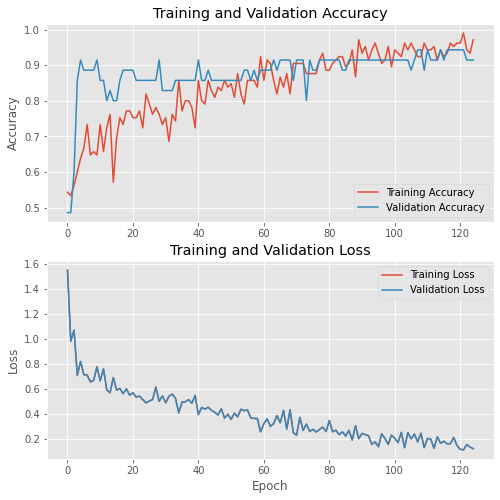

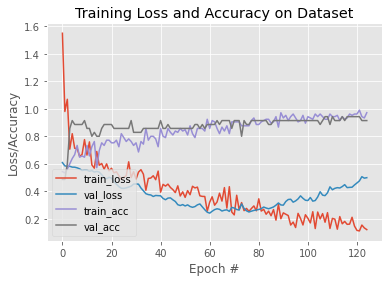

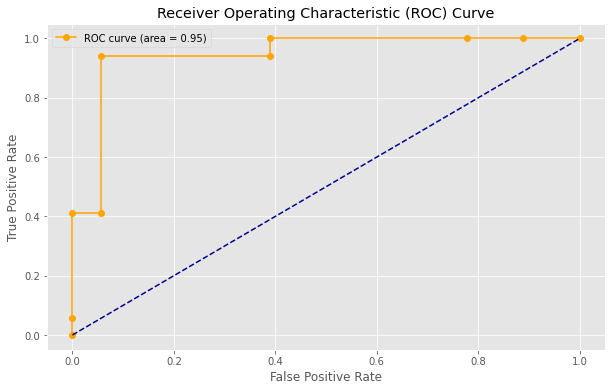

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  64
  65  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139] TEST: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 66 67 68 69 70 71]
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 50)                1950      
_________________________________________________________________
dropout_60 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_89 (Dense)             (Non

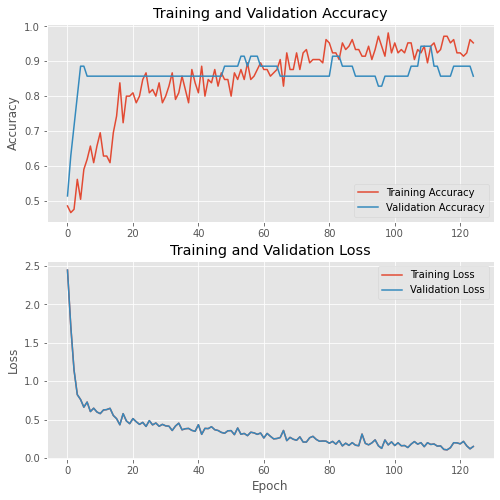

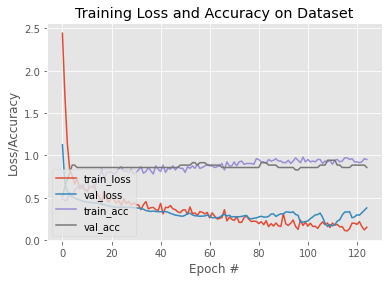

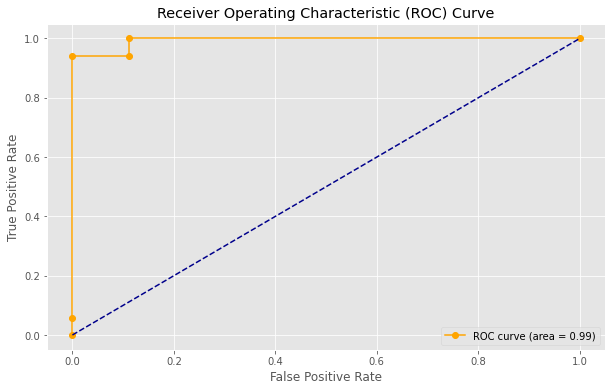

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  66  67  68  69  70  71 103 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139] TEST: [ 64  65  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 104 105]
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 50)                1950      
_________________________________________________________________
dropout_64 (Dropout)         (None, 50)                0         
________________________________________________________________

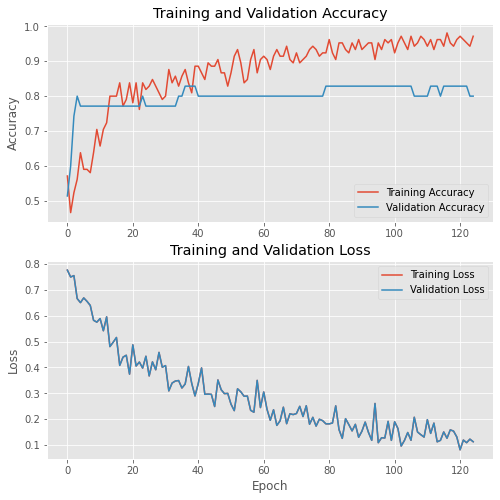

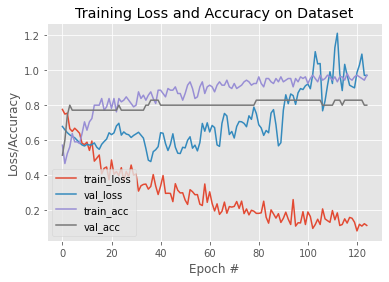

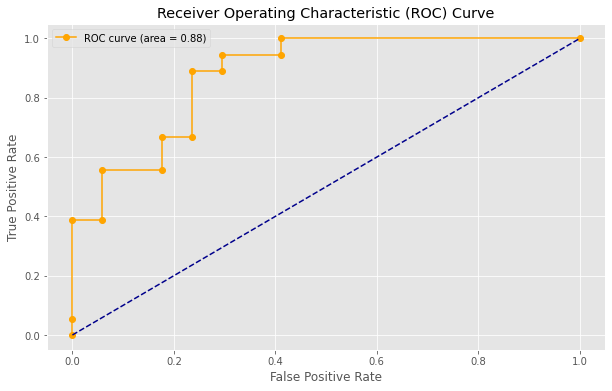

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 104 105] TEST: [103 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139]
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 50)                1950      
_________________________________________________________________
dropout_68 (Dropout)         (None, 50)                0         
________________________________________________________________

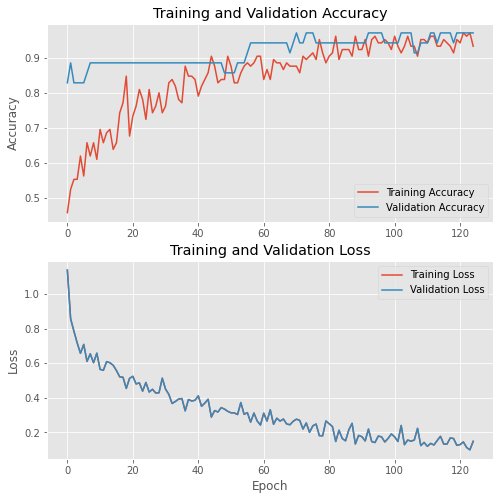

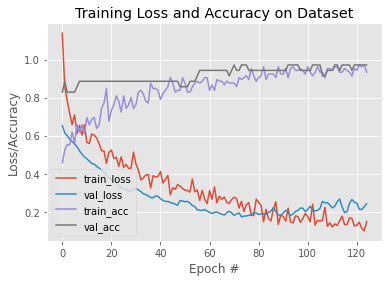

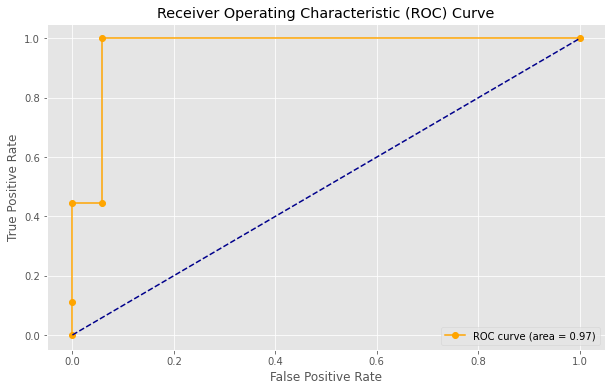

In [42]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics.ranking import precision_recall_curve, roc_auc_score, roc_curve
import numpy as np

try:
    import keras
    import numpy as np
    import matplotlib.pyplot as plt
    from imblearn.keras import balanced_batch_generator
    from imblearn.under_sampling import NearMiss
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Activation, Flatten
    from keras.optimizers import Adam
    from keras.losses import categorical_crossentropy
    from keras import regularizers
    from tensorflow.keras.optimizers import SGD

except:
    print("Keras not found")

complete_model_scaled_df = complete_model_scaled_df.sample(frac=1)
X = complete_model_scaled_df.loc[:, complete_model_scaled_df.columns != 'presence/pseudo_absence'].to_numpy()
y = complete_model_scaled_df.loc[:, complete_model_scaled_df.columns == 'presence/pseudo_absence'].to_numpy()
skf = StratifiedKFold(n_splits=4)
for i,train_index, test_index in enumerate(skf.split(X, y)):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  test_set=pd.DataFrame(X_test)
  test_set.rename(columns=dict(zip(test_set.columns, list_names_raster)),inplace=True)

  shuffled_X_train=X_train.copy()
  np.random.shuffle(shuffled_X_train)

  shuffled_X_test=X_test.copy()
  np.random.shuffle(shuffled_X_test)
  
  ####################################
  #      Training and testing        #
  ####################################
  
  # prepare metrics
  test_loss=[]
  test_acc=[]
  test_AUC=[]
  test_tpr=[]
  test_uci=[]
  test_lci=[]

  Best_model_AUC=[0]

  batch_size = 10#75
  num_classes = 2
  epochs = 125#125

  num_inputs = X.shape[1]  # number of features

  model = Sequential()
  layer_1 = Dense(50, activation='relu',input_shape=(num_inputs,))#, kernel_regularizer=regularizers.l1(0.000001))
  layer_2 = Dense(25, activation='relu', input_shape=(num_inputs,))#, kernel_regularizer=regularizers.l1(0.000001))
  layer_3 = Dense(25, activation='relu', input_shape=(num_inputs,))#, kernel_regularizer=regularizers.l1(0.0000001))
  layer_4 = Dense(25, activation='relu', input_shape=(num_inputs,))#, kernel_regularizer=regularizers.l1(0.00000001))
  model.add(layer_1)
  model.add(Dropout(0.3))
  model.add(layer_2)
  model.add(Dropout(0.5))
  model.add(layer_3)
  model.add(Dropout(0.3))
  model.add(layer_4)
  model.add(Dropout(0.5))
  out_layer = Dense(num_classes, activation=None)
  model.add(out_layer)
  model.add(Dense(1,activation='sigmoid'))
  model.summary()


  # model = keras.Sequential([
  #     keras.layers.Dense(200, activation="relu"),
  #     keras.layers.Dense(200, activation="relu"),
  #     keras.layers.Flatten(input_shape=(num_inputs,)),
  #     keras.layers.Dense(100, activation="relu"),
  #     keras.layers.Dense(30, activation="relu"),
  #     #keras.layers.Dense(2, activation="softmax"),
  #     keras.layers.Dense(1,activation='sigmoid')
  # ])

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC'])

  score = model.evaluate(X_test,y_test,verbose=1)
  print('Valid loss:', score[0])
  print('Valid acc:', score[1])

  H = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=epochs,batch_size=batch_size,verbose=0)
  H.history.keys()

  # plot_loss_accuracy_epoch(H)

  train_acc = result.history['accuracy']
  train_loss = result.history['loss']
  val_acc = result.history['val_accuracy']
  val_loss = result.history['val_loss']

  
  baseline_kfold_result_folder = f"{project_root}/Results/{species_name}/Kfold{i}"
  utils_methods.create_folder_structure(baseline_kfold_result_folder)

  plot_and_save_loss(train_vector,test_vector,os.path.join(baseline_kfold_result_folder,"Losses"))
  plot_and_save_acc(train_vector,test_vector,os.path.join(baseline_kfold_result_folder,"Accuracy"))
  plot_roc_curve(y_true, y_score,os.path.join(baseline_kfold_result_folder,"ROC_AUC"),figsize=(10,6))
  

  # N = 2
  # plt.style.use("ggplot")
  # plt.figure()
  # plt.plot(H.history["loss"], label="train_loss")
  # plt.plot(H.history["val_loss"], label="val_loss")
  # plt.plot(H.history["accuracy"], label="train_acc")
  # plt.plot(H.history["val_accuracy"], label="val_acc")
  # plt.title("Training Loss and Accuracy on Dataset")
  # plt.xlabel("Epoch #")
  # plt.ylabel("Loss/Accuracy")
  # plt.legend(loc="lower left")
  # plt.show()

  yhat = model.predict_proba(X_test)
  yhat = yhat[:, 0] # manter somente para a classe positiva
  plot_roc_curve(y_test, yhat)